In [1]:
import pandas as pd
import scipy.stats as sp
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("dataset/AWS_sample.txt", sep="#")
df = df.loc[df["AWS_ID"] == 108]
df.head(2)

,AWS_ID,TM,TA,Wind,X.
0,108,2016-07-01 00,24.2,2.3,=
1,108,2016-07-01 01,24.3,2.3,=


((array([-3.49673324, -3.25267312, -3.11769007, ...,  3.11769007,
          3.25267312,  3.49673324]),
  array([ 1.7,  1.9,  2.2, ..., 36.1, 36.2, 36.4])),
 (5.970046716953083, 23.413829425756028, 0.9896240027556145))

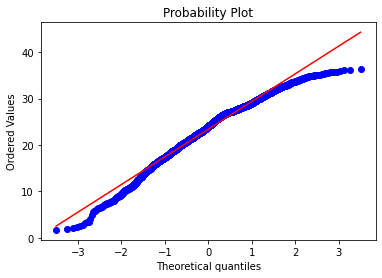

In [3]:
sp.probplot(df["TA"], plot=plt)

In [4]:
df = pd.read_csv("dataset/bike.csv")
df.kurtosis()

season        -1.355661
holiday       30.046975
workingday    -1.397828
weather        0.395533
temp          -0.914530
atemp         -0.850076
humidity      -0.759818
windspeed      0.630133
casual         7.551629
registered     2.626081
count          1.300093
dtype: float64

In [6]:
df["temp"].kurtosis() #첨도

-0.9145302637630794

In [7]:
df.temp.skew()

0.003690844422472008

In [10]:
df2 = df.set_index("season")
df2.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,,
1,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40
1,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,32
1,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,13
1,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
df2.kurtosis(level="season")

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,
1,32.921622,-1.400471,0.384670,0.114545,-0.106134,-0.433792,0.335609,34.286416,4.709668,4.314757
2,52.052753,-1.302876,0.347588,-0.232492,-0.060169,-1.007305,0.237428,5.527495,1.707194,0.425213
3,23.550413,-1.441438,0.972714,0.175452,2.439905,-0.746044,1.756376,3.142335,2.093644,0.699383
4,23.560818,-1.440570,0.028475,-0.493403,-0.580080,-0.961572,-0.072296,12.343876,2.310093,1.273485


In [13]:
df3 = df.set_index(["season", "holiday"])
df3.head()

datetime  workingday  weather  temp   atemp  \
season holiday                                                           
1      0        2011-01-01 00:00:00           0        1  9.84  14.395   
       0        2011-01-01 01:00:00           0        1  9.02  13.635   
       0        2011-01-01 02:00:00           0        1  9.02  13.635   
       0        2011-01-01 03:00:00           0        1  9.84  14.395   
       0        2011-01-01 04:00:00           0        1  9.84  14.395   

                humidity  windspeed  casual  registered  count  
season holiday                                                  
1      0              81        0.0       3          13     16  
       0              80        0.0       8          32     40  
       0              80        0.0       5          27     32  
       0              75        0.0       3          10     13  
       0              75        0.0       0           1      1

In [14]:
df3.iloc[:, 1:].kurtosis(level=["season", "holiday"])

workingday   weather      temp     atemp  humidity  windspeed  \
season holiday                                                                  
1      0         -1.246819  0.404278  0.085533 -0.126089 -0.456243   0.358447   
       1          0.000000 -0.120643 -0.039062  2.465892  3.542508  -0.461219   
2      0         -1.191449  0.304371 -0.215417 -0.043023 -1.013751   0.277178   
       1          0.000000  2.392365 -0.964497 -1.217644 -0.868578  -0.251322   
3      0         -1.241264  1.048749  0.144282  2.423765 -0.741032   1.762250   
       1          0.000000 -0.527732  0.353689  0.070978 -0.765898   2.103889   
4      0         -1.240232 -0.003151 -0.523005 -0.585588 -0.958516  -0.110445   
       1          0.000000  1.415165 -0.159531 -0.606510 -1.086226   0.571969   

                   casual  registered     count  
season holiday                                   
1      0        33.454243    4.589186  4.194842  
       1         1.606877   -0.793776 -0.780784  
2      0         5.450542    1.706700  0.412724  
       1        -0.471653    2.021007  1.515016  
3      0         3.655936    2.042064  0.762224  
       1        -1.360938   -1.162891 -1.483442  
4      0        13.049529    2.342205  1.338254  
       1         0.128554   -0.420820 -1.085700

In [20]:
df_sub = df.loc[df["casual"] >= df["casual"].quantile(0.99)]
df_sub

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2751,2011-07-03 13:00:00,3,0,0,1,32.80,38.635,59,15.0013,248,173,421
2775,2011-07-04 13:00:00,3,1,0,2,31.98,35.605,49,0.0000,242,181,423
3687,2011-09-04 13:00:00,3,0,0,2,31.98,37.120,62,19.0012,245,174,419
4236,2011-10-08 13:00:00,4,0,0,1,25.42,31.060,46,7.0015,256,229,485
4237,2011-10-08 14:00:00,4,0,0,1,25.42,31.060,50,6.0032,251,214,465
...,...,...,...,...,...,...,...,...,...,...,...,...
10204,2012-11-10 14:00:00,4,0,0,1,22.14,25.760,37,0.0000,280,347,627
10227,2012-11-11 13:00:00,4,0,0,1,22.14,25.760,45,7.0015,262,424,686
10228,2012-11-11 14:00:00,4,0,0,1,24.60,31.060,33,11.0014,292,362,654
10229,2012-11-11 15:00:00,4,0,0,1,22.96,26.515,37,15.0013,304,420,724


In [21]:
df = pd.read_csv("dataset/iris_missing.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  143 non-null    float64
 1   Sepal.Width   137 non-null    float64
 2   Petal.Length  136 non-null    float64
 3   Petal.Width   144 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.fillna()